**ANALYSIS OF TITANIC DATA SET**


In [5]:
#import main files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVC

%matplotlib inline

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
titanic_cln = titanic.drop(['Ticket', 'Cabin', 'Name'], axis=1)
titanic_cln.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [11]:
convert_type = {'PassengerId': 'category', 'Survived': 'category', 'Pclass': 'category', 
              'Sex': 'category','SibSp': 'category', 
              'Parch': 'category',
              'Embarked': 'category'}

titanic_clean = titanic_cln.astype(convert_type)
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null category
Survived       891 non-null category
Pclass         891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null category
Parch          891 non-null category
Fare           891 non-null float64
Embarked       889 non-null category
dtypes: category(7), float64(2)
memory usage: 69.0 KB


In [12]:
titanic_clean.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [13]:
df = titanic_clean.groupby('Sex').count()
df = df.drop(['PassengerId'], axis=1)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,
female,314,314,261,314,314,314,312
male,577,577,453,577,577,577,577


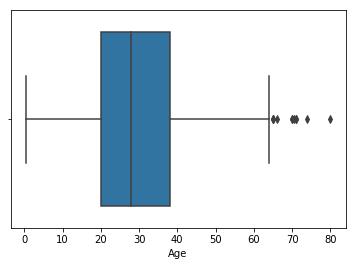

In [14]:
sns.boxplot(x=titanic_clean.Age, hue=titanic_clean.Survived)


In [15]:
df = titanic_clean['Age'].mean()
df_em = titanic_clean['Embarked'].mode()
print(df)
print(df_em)

29.69911764705882
0    S
Name: Embarked, dtype: category
Categories (3, object): [C, Q, S]


In [16]:
titanic_clean['Age'].fillna(titanic_clean['Age'].mean(), inplace=True, axis=0)
titanic_clean['Embarked'].fillna('S', inplace=True, axis=0)

In [17]:
titanic_clean.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [18]:
titanic_clean.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [19]:
#sns.pairplot(titanic_clean, diag_kind='kde')

In [20]:
sex = pd.get_dummies(titanic_clean['Sex'], drop_first=True)
embarked = pd.get_dummies(titanic_clean['Embarked'], drop_first=True)

In [21]:
titanic_clean.drop(['Sex', 'Embarked'],  inplace = True, axis=1)

titanic_clean = pd.concat([titanic_clean, sex, embarked], axis = 1)

In [27]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [28]:
y = titanic_clean['Survived']
X = titanic_clean.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [29]:
scale = StandardScaler()
X_new = X.values
X_scale = scale.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=23)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [30]:
colNames = X.columns

model1 = SVC(kernel='linear', C=0.1)
modftr = RFE(estimator=model1, n_features_to_select=1, step=1)
modftr.fit(X_scale, y)
ranking = modftr.ranking_


ranking_df = pd.DataFrame()
ranking = pd.Series(ranking)
colNames = pd.Series(colNames)
ranking_final = pd.concat([ranking_df, ranking, colNames], axis=1)


In [31]:
ranking_final.columns = ['Rank', 'Features']

ranking_final.sort_values(by='Rank', ascending=True)


,Rank,Features
6,1,male
3,2,SibSp
5,3,Fare
4,4,Parch
2,5,Age
1,6,Pclass
0,7,PassengerId
8,8,S
7,9,Q


In [32]:
X_opt1 =  X.drop(['PassengerId', 'S','Q'], axis=1)
X_opt2 = X_opt1.values
X_opt = scale.fit_transform(X_opt2)
X_opt1.columns

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

In [33]:
def optmodel (model, X, y, param_grid, cv):
    mod = GridSearchCV(model, param_grid, cv=cv)
    mod.fit(X, y)
    print('Best Parameters:',mod.best_params_)
    print('Best Score:', mod.best_score_)
    
clf = SVC(class_weight='balanced')
param_grid= {'kernel':('rbf', 'poly', 'linear', 'sigmoid'),'degree':np.arange(1, 2)}

optmodel(clf, X_scale, y, param_grid, 10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Best Parameters: {'degree': 1, 'kernel': 'rbf'}
Best Score: 0.8159371492704826


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

[[135  22]
 [ 27  84]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       157
           1       0.79      0.76      0.77       111

   micro avg       0.82      0.82      0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

0.8083146841108625


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


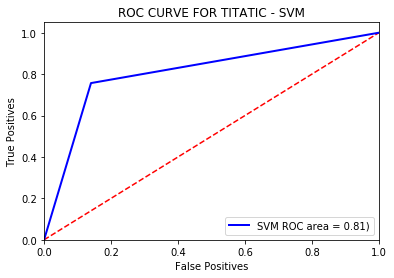

In [89]:
clf_svc = SVC(kernel='rbf', class_weight='balanced', degree=1)

Xa_train, Xa_test, ya_train, ya_test = train_test_split(X_scale, y, test_size= 0.3, random_state=42)
clf_svc.fit(Xa_train, ya_train)
pred = clf_svc.predict(Xa_test)

print(confusion_matrix(ya_test, pred))
print(classification_report(ya_test, pred))
print(roc_auc_score(ya_test, pred))


fp, tp, threshold  = roc_curve(ya_test, pred)
auc = roc_auc_score(ya_test, pred)


plt.figure()
plt.xlabel('False Positives')
plt.ylabel('True Positives')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.05)
plt.plot(fp, tp, color='blue', lw=2, label='SVM ROC area = %0.2f)' %auc)
plt.title('ROC CURVE FOR TITATIC - SVM')
plt.legend(loc="lower right")


In [35]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()

param_grid1 = {'n_neighbors' : np.arange(1, 10, 1), 'weights':('uniform', 'distance'), 
               'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'), 'p' : np.arange(1,2,1)}

optmodel(KNN, X_scale, y, param_grid1, 10)



Best Parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Score: 0.8181818181818182


In [36]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(class_weight='balanced')

param_grid2 = {'penalty' : ('l1', 'l2'), 'solver' : ('liblinear', 'saga') }

optmodel(regr, X_opt, y, param_grid2, 10)


Best Parameters: {'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7890011223344556


In [37]:
regr2 = LogisticRegression(penalty='l2')

param_grid3 = {'solver' : ('newton-cg', 'sag', 'lbfgs') }

optmodel(regr2, X_scale, y, param_grid3, 5)

Best Parameters: {'solver': 'sag'}
Best Score: 0.7845117845117845


In [38]:
regr

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [39]:
from sklearn.tree import DecisionTreeClassifier

Dtree = DecisionTreeClassifier(class_weight='balanced')

param_grid4 = {'criterion':('gini','entropy'), 'splitter':('best','random'), 'max_depth': np.arange(1, 10)}

optmodel(Dtree, X_opt, y, param_grid4, 5)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
Best Score: 0.8249158249158249


In [40]:
dtree_mod = DecisionTreeClassifier(criterion = 'entropy', splitter='best', max_depth=5, class_weight='balanced')

Xd_train, Xd_test, yd_train, yd_test = train_test_split(X_opt, y, test_size=0.3, random_state=42)

dtree_mod.fit(Xd_train, yd_train)

pred_d = dtree_mod.predict(Xd_test)

print(confusion_matrix(yd_test, pred_d))
print(classification_report(yd_test, pred_d))
print('Accuracy:', dtree_mod.score(Xd_test, yd_test))
auc = roc_auc_score(yd_test, pred_d)
print(auc)

[[140  17]
 [ 33  78]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.82      0.70      0.76       111

   micro avg       0.81      0.81      0.81       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8134328358208955
0.7972112239628163


In [41]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
label = X_opt1.columns
label

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male'], dtype='object')

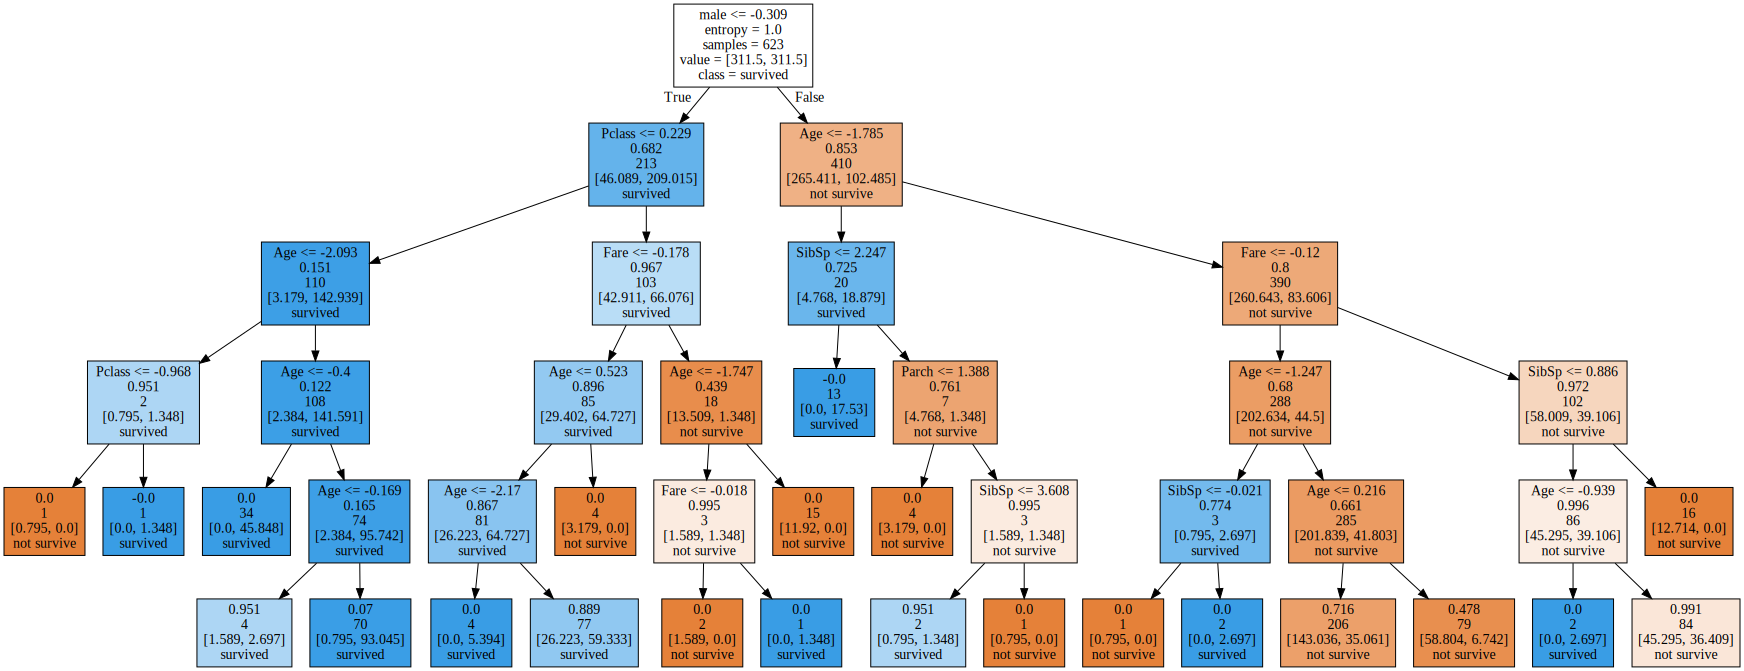

In [42]:
graph = Source(tree.export_graphviz(dtree_mod, out_file=None
   , class_names=['not survive', 'survived'],filled = True, label='root', feature_names=label))

display(SVG(graph.pipe(format='svg')))

In [45]:
from sklearn.ensemble import BaggingClassifier


bgcl = BaggingClassifier(base_estimator=Dtree)

param_grida = {'n_estimators':np.arange(1, 100, 1), 'max_samples':np.arange(0.1, 1, 0.1),
              'max_features':np.arange(2, 6, 1),'bootstrap':(True, False) }

optmodel(bgcl, X_opt, y, param_grida, 10)


Best Parameters: {'bootstrap': False, 'max_features': 4, 'max_samples': 0.30000000000000004, 'n_estimators': 28}
Best Score: 0.8462401795735129


In [76]:
bgcl1 = BaggingClassifier(base_estimator=Dtree, bootstrap=False, max_features=6, max_samples=0.4, 
                          n_estimators=28)
bgcl1 = bgcl1.fit(X_opt, y)
pred_ens = bgcl1.predict(Xd_test)
print(confusion_matrix(yd_test,pred_ens))
print(classification_report(yd_test,pred_ens))
print(roc_auc_score(yd_test,pred_ens))

[[150   7]
 [ 14  97]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       157
           1       0.93      0.87      0.90       111

   micro avg       0.92      0.92      0.92       268
   macro avg       0.92      0.91      0.92       268
weighted avg       0.92      0.92      0.92       268

0.9146439433063637


In [88]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1.0, random_state=42)

Xs_train, ys_train = sm.fit_sample(Xd_train, yd_train)


daMod = AdaBoostClassifier(base_estimator=Dtree, learning_rate=0.001,n_estimators=50)

daMod = daMod.fit(Xs_train, ys_train)

pred_ad = daMod.predict(Xd_test)
print(confusion_matrix(yd_test,pred_ad))
print(classification_report(yd_test,pred_ad))
print(roc_auc_score(yd_test,pred_ad))



[[123  34]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.68      0.69       111

   micro avg       0.74      0.74      0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268

0.7340620875652724


In [86]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

adaMod = AdaBoostClassifier(base_estimator=Dtree)

param_gridA = {'n_estimators':np.arange(1,100,1), 'learning_rate':np.arange(0.001, 1, 10)}

optmodel(adaMod, Xs_train, ys_train, param_gridA, 10)

Best Parameters: {'learning_rate': 0.001, 'n_estimators': 18}
Best Score: 0.8239795918367347


In [85]:
adaMod = AdaBoostClassifier(base_estimator=Dtree, learning_rate=0.001,n_estimators=50)

adaMod = adaMod.fit(Xd_train, yd_train)

pred_ada = adaMod.predict(Xd_test)
print(confusion_matrix(yd_test,pred_ada))
print(classification_report(yd_test,pred_ada))
print(roc_auc_score(yd_test,pred_ada))


[[132  25]
 [ 35  76]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.75      0.68      0.72       111

   micro avg       0.78      0.78      0.78       268
   macro avg       0.77      0.76      0.77       268
weighted avg       0.77      0.78      0.77       268

0.762724507947438
